In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [2]:
pd.set_option('display.max_column', None)

## We next read all the csv files and combine them into one dataframe

In [ ]:
df1_0 = pd.read_csv('EyeT_group_dataset_III_image_name_letter_card_participant_1_trial_0.csv')

In [ ]:
df1_0.head()

In [ ]:
test = df1_0.copy()

In [ ]:
df_all = pd.DataFrame(columns = test.columns) 
df_all #We initialize an empty dataframe where we are going to save all the data

In [ ]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
#loop over the list of csv files
i = 0
#There are a total of 502 csv files, let us use the first 100
for f in csv_files:
    if i < 100:
        # read the csv file\
        df_temp = pd.read_csv(f) #Current dataframe
        frames = [df_all, df_temp]
        df_all = pd.concat(frames)
        i+=1 
        print('Done',i) #To help us know the progress when code is running as it takes time

In [ ]:
df_all.head()

In [ ]:
df_all.shape

In [ ]:
df_all.isna().sum()

In [ ]:
# We drop all the redundant variables. These contain only one variable in the entire dataset or are timestamps
drop_list = ['Unnamed: 0', 'Recording duration','Recording timestamp','Computer timestamp','Project name', 
             'Export date', 'Recording name', 'Recording date', 'Recording date UTC',
             'Recording start time', 'Recording start time UTC', 'Timeline name','Recording Fixation filter name', 
             'Recording software version', 'Recording resolution height','Recording resolution width', 
             'Recording monitor latency', 'Event', 'Event value','Presented Stimulus name', 'Presented Media name',
             'Presented Media width','Presented Media height', 'Presented Media position X (DACSpx)',
             'Presented Media position Y (DACSpx)', 'Original Media width','Original Media height',
             'Mouse position X', 'Mouse position Y']
#cols = df_all.columns
for i in range(0, len(drop_list)):
    variable = drop_list[i]
    var_len = len(df_all[variable].value_counts())
    #print(variable,': ', var_len)
    print('Variable: {}     length: {}'.format(variable, var_len))

The variables that only have one category throughout the dataset are dropped. These are:
- Recording Fixation filter name     
- Recording software version     
- Recording resolution height     
- Recording resolution width     
- Recording monitor latency 

In addition to that, there are a lot of missing values for Event, Event value, Mouse position X, Mouse position Y 

In [ ]:
df_all_updated = df_all.drop(columns=['Unnamed: 0', 'Recording duration','Recording timestamp','Computer timestamp',
                                      'Project name','Export date','Recording name', 
                                      'Recording date', 'Recording date UTC','Recording start time',
                                      'Recording start time UTC', 'Timeline name','Recording Fixation filter name',
                                      'Recording software version', 'Recording resolution height',
                                      'Recording resolution width', 'Recording monitor latency', 'Event', 
                                      'Event value','Presented Stimulus name', 'Presented Media name', 
                                      'Presented Media width',
             'Mouse position X', 'Mouse position Y'])

In [ ]:
df_all_updated.head()

In [ ]:
df_all_updated.shape

In [ ]:
df_all_updated.isna().sum()

- We are going to drop those column that have a lot of missing values too

In [ ]:
drop_list2 = ['Pupil diameter left', 'Pupil diameter right', 'Gaze point left X (MCSnorm)', 
              'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)',
             'Fixation point X', 'Fixation point Y', 'Fixation point X (MCSnorm)', 'Fixation point X (MCSnorm)',
             'Fixation point Y (MCSnorm)']

In [ ]:
df_all_updated2 = df_all_updated.drop(columns = drop_list2)

In [ ]:
df_all_updated2.head()

In [ ]:
df_all_updated2.shape

In [ ]:
df_all_updatedna = df_all_updated.dropna()

In [ ]:
df_all_updatedna.info()

In [ ]:
df_all_updatedna.head()

In [ ]:
df_all_updatedna.shape

## Variable Correlation

In [ ]:
df_all_updatedna.corr()

In [ ]:
#Let us visualize this 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_all_updatedna.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- There are a number of highly correlated pairs, we will therefore drop one of them for each pair.

- Eye movement type index and Eyetracker timestamp
- Gaze point left X and Gaze point X
- Gaze point right X and Gaze point X
- Fixation point X and Gaze point X
- Gaze point left Y and Gaze point Y
- Gaze point right Y and Gaze point Y
- Fixation point Y and Gaze point Y
- Gaze point right X and Gaze point left X
- Fixation point X and Gaze point left X
- Gaze point Y and Gaze point left Y
- Gaze point right Y and Gaze point left Y
- Fixation point Y and Gaze point left Y
- Fixation point X and Gaze point right X
- Gaze point Y and Gaze point right Y
- Gaze point X and Fixation point X
- Gaze point right Y and Fixation point Y

In [ ]:
df_all_updatedna.head() #Some columns contain commas instead of dots so let us replace them

In [ ]:
df1 = df_all_updatedna.applymap(lambda x: str(x).replace(',', '.'))

In [ ]:
dft = df1.apply(pd.to_numeric, errors='ignore')

In [ ]:
dft.info()

- For the final dataframe, we will find the mean of all the columns as per the participants, then add the target colunm indicating the score as follows

In [ ]:
final_df = dft.groupby(['Participant name']).mean() 
final_df

In [ ]:
len(final_df)

In [ ]:
# Getting the score values
scores_df = pd.read_csv('labels/Questionnaire_datasetIA.csv', encoding = 'unicode_escape')

In [ ]:
scores_df.head()

In [ ]:
scores = pd.DataFrame({'Participant':scores_df['Participant nr'].values, 
                      'Score':scores_df['Total Score extended'].values})

In [ ]:
scores.head()

In [ ]:
#In our data, not all participants are available since we did not read all the data, we will therefore 
#choose score values for the available participants
import re

In [ ]:
participants = []
for i in final_df.index:
    value = int(re.findall("\d+", i)[0])
    participants.append(value)
participants

In [ ]:
available = scores['Participant'].values #Available participants
available

In [ ]:
available_scores = []
for num in participants:
    my_bool = num in available
    if my_bool == True:
        available_scores.append(scores['Score'].loc[num-1]) #index starts from 0 but participants from 1

In [ ]:
final_df['score'] = available_scores #Adding the score column

In [ ]:
final_df.head()

In [ ]:
#let's check the values that can be used to predict the score by seeing the correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(final_df.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
final_df.corr()

# Part 2

In [ ]:
df1_0 = pd.read_csv('EyeT_group_dataset_III_image_name_letter_card_participant_1_trial_0.csv')

In [ ]:
#Loading the whole dataset for modeling
df_all = pd.DataFrame(columns = df1_0.columns) 
df_all #We initialize an empty dataframe where we are going to save all the data

In [ ]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
#loop over the list of csv files
i = 0
#There are a total of 502 csv files, let us use the first 100
for f in csv_files:
    # read the csv file
    df_temp = pd.read_csv(f) #Current dataframe
    frames = [df_all, df_temp]
    df_all = pd.concat(frames)
    i+=1 
    print('Done',i) #To help us know the progress when code is running as it takes time

In [ ]:
df_all.head()

In [ ]:
df_all.to_csv('data.csv') #We save this in one csv file

In [3]:
# import required modules
import pandas as pd
import numpy as np
import time

# time taken to read data
s_time_chunk = time.time()
chunk = pd.read_csv('data.csv', chunksize=500)
e_time_chunk = time.time()

print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")
df = pd.concat(chunk)

# data
df.sample(10)

With chunks:  0.07809829711914062 sec


,Unnamed: 0,Unnamed: 0.1,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,Recording duration,Timeline name,Recording Fixation filter name,Recording software version,Recording resolution height,Recording resolution width,Recording monitor latency,Eyetracker timestamp,Event,Event value,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Stimulus name,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
1029271,6914,43844,60966074,610803986920,Eye Tracker,Participant0023,10.02.2021,Participant0023,Recording5,10.02.2021,10.02.2021,12:44:03.137,11:44:03.137,138080,Timeline1,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",1.374179e+09,NaN,NaN,1128.0,646.0,NaN,NaN,1128.0,646.0,NaN,NaN,NaN,"0,05181","0,33383","-0,94121",NaN,NaN,Invalid,Valid,NaN,NaN,NaN,"279,6","-14,0","537,8",NaN,NaN,"309,2","176,8","0,6126","0,5980",NaN,NaN,"0,6126","0,5980",103111957_1133015250388940_5990313860353693579_n,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,158.0,172.0,1115.0,719.0,"0,6035","0,6661",NaN,NaN
4059325,7289,270135,64664724,8711322648,Eye Tracker,Test group experiment,29.10.2020,Participant0007,Recording27,20.10.2020,20.10.2020,14:22:26.260,12:22:26.260,73078,Timeline2,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",8.381191e+09,NaN,NaN,1214.0,600.0,1176.0,621.0,1252.0,578.0,"0,25337","0,17993","-0,95049","0,16266","0,15181","-0,97493",NaN,NaN,Valid,Valid,"195,5","79,9","476,0","262,7","83,2","482,0","322,4","170,1","343,1","158,2","0,6703","0,5553","0,6450","0,5754","0,6956","0,5353",103111957_1133015250388940_5990313860353693579_n,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,158.0,200.0,1215.0,598.0,"0,6707","0,5537",NaN,NaN
283487,23288,54932,197800480,1643495747,Eye Tracker,Participant0013,25.11.2020,Participant0013,Recording4,25.11.2020,25.11.2020,15:26:47.090,14:26:47.090,209613,Timeline2,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",1.549528e+09,NaN,NaN,863.0,478.0,791.0,443.0,934.0,512.0,"-0,06253","-0,01825","-0,99788","-0,11820","0,01132","-0,99293","2,99","2,68",Valid,Valid,"246,6","130,0","476,0","312,3","134,8","472,8","216,8","121,3","256,0","140,2","0,4347","0,4423","0,3869","0,4103","0,4826","0,4742",103111957_1133015250388940_5990313860353693579...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Saccade,83.0,880.0,NaN,NaN,NaN,NaN,NaN,NaN
1708726,7038,40735,62048477,1301587069016,Eye Tracker,Participant0029,18.02.2021,Participant0029,Recording4,18.02.2021,18.02.2021,12:36:55.257,11:36:55.257,194244,Timeline1,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",8.006872e+10,NaN,NaN,437.0,-26.0,372.0,18.0,502.0,-69.0,"-0,24817","0,02570","-0,96838","-0,28721","-0,00433","-0,95786","2,25","2,35",Valid,Valid,"242,4","-9,7","548,3","304,0","-16,4

In [4]:
df.shape

(4844304, 72)

In [5]:
# We drop all the redundant variables. These contain only one variable in the entire dataset or are timestamps
drop_list = ['Unnamed: 0', 'Recording duration','Recording timestamp','Computer timestamp','Project name', 
             'Export date', 'Recording name', 'Recording date', 'Recording date UTC',
             'Recording start time', 'Recording start time UTC', 'Timeline name','Recording Fixation filter name', 
             'Recording software version', 'Recording resolution height','Recording resolution width', 
             'Recording monitor latency', 'Event', 'Event value','Presented Stimulus name', 'Presented Media name',
             'Presented Media width','Presented Media height', 'Presented Media position X (DACSpx)',
             'Presented Media position Y (DACSpx)', 'Original Media width','Original Media height',
             'Mouse position X', 'Mouse position Y']
#cols = df_all.columns
for i in range(0, len(drop_list)):
    variable = drop_list[i]
    var_len = len(df[variable].value_counts())
    #print(variable,': ', var_len)
    print('Variable: {}     length: {}'.format(variable, var_len))

Variable: Unnamed: 0     length: 27545
Variable: Recording duration     length: 357
Variable: Recording timestamp     length: 3403168
Variable: Computer timestamp     length: 3499175
Variable: Project name     length: 51
Variable: Export date     length: 33
Variable: Recording name     length: 48
Variable: Recording date     length: 33
Variable: Recording date UTC     length: 33
Variable: Recording start time     length: 358
Variable: Recording start time UTC     length: 358
Variable: Timeline name     length: 3
Variable: Recording Fixation filter name     length: 1
Variable: Recording software version     length: 1
Variable: Recording resolution height     length: 1
Variable: Recording resolution width     length: 1
Variable: Recording monitor latency     length: 1
Variable: Event     length: 5
Variable: Event value     length: 21
Variable: Presented Stimulus name     length: 14
Variable: Presented Media name     length: 8
Variable: Presented Media width     length: 6
Variable: Presen

In [6]:
#We drop these columns
df_updated = df.drop(columns=drop_list)

In [7]:
print(df_updated.shape)
df_updated.head()

(4844304, 43)


,Unnamed: 0.1,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
0,3082,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160"
1,3083,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160"
2,3084,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,"0,07366","0,00290","-0,99728","0,00460","0,04058","-0,99917",NaN,NaN,Valid,Valid,"197,2","76,9","829,0","264,8","76,0","837,4","258,5","79,4","268,6","110,0","0,5011","0,3203","0,4886","0,2685","0,5135","0,3721",Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160"
3,3085,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,"0,06367","0,00355","-0,99796","0,01509","0,04295","-0,99896",NaN,NaN,Valid,Valid,"197,2","76,9","829,0","264,8","75,8","837,8","250,1","79,9","277,4","111,9","0,5016","0,3244","0,4682","0,2703","0,5350","0,3785",Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160"
4,3086,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,"0,06370","0,00355","-0,99796","0,01510","0,04013","-0,99908","3,21","3,14",Valid,Valid,"197,2","76,9","829,0","264,8","75,7","838,2","250,1","79,9","277,4","109,4","0,5016","0,3202","0,4682","0,2703","0,5350","0,3701",Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160"


In [8]:
#Check for missing values
df_updated.isna().sum()

Unnamed: 0.1                           0
Sensor                              3171
Participant name                       0
Eyetracker timestamp               55284
Gaze point X                      603286
Gaze point Y                      603286
Gaze point left X                 963009
Gaze point left Y                 963009
Gaze point right X                977273
Gaze point right Y                977273
Gaze direction left X             963009
Gaze direction left Y             963009
Gaze direction left Z             963009
Gaze direction right X            977273
Gaze direction right Y            977273
Gaze direction right Z            977273
Pupil diameter left              3673249
Pupil diameter right             3662228
Validity left                      55284
Validity right                     55284
Eye position left X (DACSmm)      963009
Eye position left Y (DACSmm)      963009
Eye position left Z (DACSmm)      963009
Eye position right X (DACSmm)     977273
Eye position rig

In [9]:
#The following columns have a lot of missing values, it's better to drop them rather than to impute missing values
drop_list2 = ['Pupil diameter left', 'Pupil diameter right', 'Gaze point left X (MCSnorm)', 
              'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)',
             'Fixation point X', 'Fixation point Y', 'Fixation point X (MCSnorm)', 'Fixation point X (MCSnorm)',
             'Fixation point Y (MCSnorm)']

In [10]:
df_updated2 = df_updated.drop(columns = drop_list2)

In [11]:
print(df_updated2.shape)
df_updated2.head()

(4844304, 33)


,Unnamed: 0.1,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index
0,3082,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0
1,3083,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0
2,3084,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,"0,07366","0,00290","-0,99728","0,00460","0,04058","-0,99917",Valid,Valid,"197,2","76,9","829,0","264,8","76,0","837,4","258,5","79,4","268,6","110,0","0,5011","0,3203",Fixation,117.0,64.0
3,3085,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,"0,06367","0,00355","-0,99796","0,01509","0,04295","-0,99896",Valid,Valid,"197,2","76,9","829,0","264,8","75,8","837,8","250,1","79,9","277,4","111,9","0,5016","0,3244",Fixation,117.0,64.0
4,3086,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,"0,06370","0,00355","-0,99796","0,01510","0,04013","-0,99908",Valid,Valid,"197,2","76,9","829,0","264,8","75,7","838,2","250,1","79,9","277,4","109,4","0,5016","0,3202",Fixation,117.0,64.0


In [12]:
del df_updated2['Unnamed: 0.1']

In [13]:
df_updated2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Sensor                         object 
 1   Participant name               object 
 2   Eyetracker timestamp           float64
 3   Gaze point X                   float64
 4   Gaze point Y                   float64
 5   Gaze point left X              float64
 6   Gaze point left Y              float64
 7   Gaze point right X             float64
 8   Gaze point right Y             float64
 9   Gaze direction left X          object 
 10  Gaze direction left Y          object 
 11  Gaze direction left Z          object 
 12  Gaze direction right X         object 
 13  Gaze direction right Y         object 
 14  Gaze direction right Z         object 
 15  Validity left                  object 
 16  Validity right                 object 
 17  Eye position left X (DACSmm)   object 
 18  Ey

In [14]:
df_updated2.head()

,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index
0,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0
1,NaN,Participant0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.0,64.0
2,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,"0,07366","0,00290","-0,99728","0,00460","0,04058","-0,99917",Valid,Valid,"197,2","76,9","829,0","264,8","76,0","837,4","258,5","79,4","268,6","110,0","0,5011","0,3203",Fixation,117.0,64.0
3,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,"0,06367","0,00355","-0,99796","0,01509","0,04295","-0,99896",Valid,Valid,"197,2","76,9","829,0","264,8","75,8","837,8","250,1","79,9","277,4","111,9","0,5016","0,3244",Fixation,117.0,64.0
4,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,"0,06370","0,00355","-0,99796","0,01510","0,04013","-0,99908",Valid,Valid,"197,2","76,9","829,0","264,8","75,7","838,2","250,1","79,9","277,4","109,4","0,5016","0,3202",Fixation,117.0,64.0


In [15]:
#We next drop the null values
df_updated2 = df_updated2.dropna()

In [16]:
df_updated2.head()

,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index
2,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,"0,07366","0,00290","-0,99728","0,00460","0,04058","-0,99917",Valid,Valid,"197,2","76,9","829,0","264,8","76,0","837,4","258,5","79,4","268,6","110,0","0,5011","0,3203",Fixation,117.0,64.0
3,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,"0,06367","0,00355","-0,99796","0,01509","0,04295","-0,99896",Valid,Valid,"197,2","76,9","829,0","264,8","75,8","837,8","250,1","79,9","277,4","111,9","0,5016","0,3244",Fixation,117.0,64.0
4,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,"0,06370","0,00355","-0,99796","0,01510","0,04013","-0,99908",Valid,Valid,"197,2","76,9","829,0","264,8","75,7","838,2","250,1","79,9","277,4","109,4","0,5016","0,3202",Fixation,117.0,64.0
5,Eye Tracker,Participant0001,509905648.0,972.0,340.0,913.0,287.0,1031.0,393.0,"0,06385","0,00181","-0,99796","0,02104","0,03789","-0,99906",Valid,Valid,"197,2","77,0","828,9","264,8","75,6","838,5","250,2","78,5","282,4","107,4","0,5079","0,3145",Fixation,117.0,64.0
6,Eye Tracker,Participant0001,509913976.0,970.0,323.0,922.0,292.0,1017.0,354.0,"0,06698","0,00354","-0,99775","0,01667","0,02533","-0,99954",Valid,Valid,"197,2","76,9","828,9","264,8","75,6","838,8","252,8","79,9","278,7","96,8","0,5065","0,2989",Fixation,117.0,64.0


In [17]:
df_updated2.shape

(3241523, 32)

Some columns have got ',' instead of '.' as the decimal, making them to be object type instead of numerical variables. We therefore replace , with 

In [18]:
df1 = df_updated2.applymap(lambda x: str(x).replace(',', '.'))

In [19]:
df1.head()

,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index
2,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,0.07366,0.00290,-0.99728,0.00460,0.04058,-0.99917,Valid,Valid,197.2,76.9,829.0,264.8,76.0,837.4,258.5,79.4,268.6,110.0,0.5011,0.3203,Fixation,117.0,64.0
3,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,0.06367,0.00355,-0.99796,0.01509,0.04295,-0.99896,Valid,Valid,197.2,76.9,829.0,264.8,75.8,837.8,250.1,79.9,277.4,111.9,0.5016,0.3244,Fixation,117.0,64.0
4,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,0.06370,0.00355,-0.99796,0.01510,0.04013,-0.99908,Valid,Valid,197.2,76.9,829.0,264.8,75.7,838.2,250.1,79.9,277.4,109.4,0.5016,0.3202,Fixation,117.0,64.0
5,Eye Tracker,Participant0001,509905648.0,972.0,340.0,913.0,287.0,1031.0,393.0,0.06385,0.00181,-0.99796,0.02104,0.03789,-0.99906,Valid,Valid,197.2,77.0,828.9,264.8,75.6,838.5,250.2,78.5,282.4,107.4,0.5079,0.3145,Fixation,117.0,64.0
6,Eye Tracker,Participant0001,509913976.0,970.0,323.0,922.0,292.0,1017.0,354.0,0.06698,0.00354,-0.99775,0.01667,0.02533,-0.99954,Valid,Valid,197.2,76.9,828.9,264.8,75.6,838.8,252.8,79.9,278.7,96.8,0.5065,0.2989,Fixation,117.0,64.0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241523 entries, 2 to 4844298
Data columns (total 32 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Sensor                         object
 1   Participant name               object
 2   Eyetracker timestamp           object
 3   Gaze point X                   object
 4   Gaze point Y                   object
 5   Gaze point left X              object
 6   Gaze point left Y              object
 7   Gaze point right X             object
 8   Gaze point right Y             object
 9   Gaze direction left X          object
 10  Gaze direction left Y          object
 11  Gaze direction left Z          object
 12  Gaze direction right X         object
 13  Gaze direction right Y         object
 14  Gaze direction right Z         object
 15  Validity left                  object
 16  Validity right                 object
 17  Eye position left X (DACSmm)   object
 18  Eye position left Y (D

In [21]:
df3 = df1.apply(pd.to_numeric, errors='ignore')

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241523 entries, 2 to 4844298
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Sensor                         object 
 1   Participant name               object 
 2   Eyetracker timestamp           float64
 3   Gaze point X                   float64
 4   Gaze point Y                   float64
 5   Gaze point left X              float64
 6   Gaze point left Y              float64
 7   Gaze point right X             float64
 8   Gaze point right Y             float64
 9   Gaze direction left X          float64
 10  Gaze direction left Y          float64
 11  Gaze direction left Z          float64
 12  Gaze direction right X         float64
 13  Gaze direction right Y         float64
 14  Gaze direction right Z         float64
 15  Validity left                  object 
 16  Validity right                 object 
 17  Eye position left X (DACSmm)   float64
 18  Ey

In [23]:
df3.head()

,Sensor,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Eye movement type,Gaze event duration,Eye movement type index
2,Eye Tracker,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,0.07366,0.00290,-0.99728,0.00460,0.04058,-0.99917,Valid,Valid,197.2,76.9,829.0,264.8,76.0,837.4,258.5,79.4,268.6,110.0,0.5011,0.3203,Fixation,117.0,64.0
3,Eye Tracker,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,0.06367,0.00355,-0.99796,0.01509,0.04295,-0.99896,Valid,Valid,197.2,76.9,829.0,264.8,75.8,837.8,250.1,79.9,277.4,111.9,0.5016,0.3244,Fixation,117.0,64.0
4,Eye Tracker,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,0.06370,0.00355,-0.99796,0.01510,0.04013,-0.99908,Valid,Valid,197.2,76.9,829.0,264.8,75.7,838.2,250.1,79.9,277.4,109.4,0.5016,0.3202,Fixation,117.0,64.0
5,Eye Tracker,Participant0001,509905648.0,972.0,340.0,913.0,287.0,1031.0,393.0,0.06385,0.00181,-0.99796,0.02104,0.03789,-0.99906,Valid,Valid,197.2,77.0,828.9,264.8,75.6,838.5,250.2,78.5,282.4,107.4,0.5079,0.3145,Fixation,117.0,64.0
6,Eye Tracker,Participant0001,509913976.0,970.0,323.0,922.0,292.0,1017.0,354.0,0.06698,0.00354,-0.99775,0.01667,0.02533,-0.99954,Valid,Valid,197.2,76.9,828.9,264.8,75.6,838.8,252.8,79.9,278.7,96.8,0.5065,0.2989,Fixation,117.0,64.0


In [30]:
df3['Eye movement type'].value_counts()

Fixation        2016842
Saccade          690154
Unclassified     534527
Name: Eye movement type, dtype: int64

In [28]:
print(len(df3['Sensor'].value_counts()))
print(len(df3['Validity left'].value_counts()))
print(len(df3['Validity right'].value_counts())) #These columns have only one variable, so we delete them

1
1
1


In [32]:
del df3['Sensor']
del df3['Validity left']
del df3['Validity right']
del df3['Eye movement type']

In [33]:
df3.head()

,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Eye movement type index
2,Participant0001,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,0.07366,0.00290,-0.99728,0.00460,0.04058,-0.99917,197.2,76.9,829.0,264.8,76.0,837.4,258.5,79.4,268.6,110.0,0.5011,0.3203,117.0,64.0
3,Participant0001,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,0.06367,0.00355,-0.99796,0.01509,0.04295,-0.99896,197.2,76.9,829.0,264.8,75.8,837.8,250.1,79.9,277.4,111.9,0.5016,0.3244,117.0,64.0
4,Participant0001,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,0.06370,0.00355,-0.99796,0.01510,0.04013,-0.99908,197.2,76.9,829.0,264.8,75.7,838.2,250.1,79.9,277.4,109.4,0.5016,0.3202,117.0,64.0
5,Participant0001,509905648.0,972.0,340.0,913.0,287.0,1031.0,393.0,0.06385,0.00181,-0.99796,0.02104,0.03789,-0.99906,197.2,77.0,828.9,264.8,75.6,838.5,250.2,78.5,282.4,107.4,0.5079,0.3145,117.0,64.0
6,Participant0001,509913976.0,970.0,323.0,922.0,292.0,1017.0,354.0,0.06698,0.00354,-0.99775,0.01667,0.02533,-0.99954,197.2,76.9,828.9,264.8,75.6,838.8,252.8,79.9,278.7,96.8,0.5065,0.2989,117.0,64.0


In [34]:
df3.to_csv('df3.csv')

In [3]:
df3 = pd.read_csv('df3.csv')

In [4]:
df3.corr()

,Unnamed: 0,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Eye movement type index
Unnamed: 0,1.000000,-0.034580,0.041063,-0.087965,0.016389,-0.074859,0.063591,-0.099850,0.058137,-0.125909,-0.105073,0.100803,-0.139693,-0.129158,-0.140974,0.057170,0.083061,-0.135872,0.046247,0.085632,0.016390,-0.074858,0.063590,-0.099851,0.040651,-0.083464,0.074934,-0.138276
Eyetracker timestamp,-0.034580,1.000000,-0.047663,-0.029847,-0.044449,-0.021924,-0.048443,-0.037387,-0.062644,0.177190,0.161816,-0.064409,0.169625,0.156895,0.113117,-0.300245,-0.070129,0.102053,-0.302523,-0.069105,-0.044449,-0.021924,-0.048444,-0.037387,-0.048419,-0.030883,-0.009865,-0.026925
Gaze point X,0.041063,-0.047663,1.000000,-0.099698,0.974461,-0.114092,0.974577,-0.083634,0.916679,-0.168134,-0.109359,0.925799,-0.150380,-0.275373,0.020770,0.095688,0.158713,0.032257,0.114776,0.144306,0.974461,-0.114093,0.974577,-0.083633,0.993028,-0.101284,-0.024729,-0.013075
Gaze point Y,-0.087965,-0.029847,-0.099698,1.000000,-0.088956,0.992427,-0.105341,0.992277,-0.083780,0.719666,0.444497,-0.099546,0.721098,0.427042,0.025062,0.168958,-0.034105,0.031564,0.170117,-0.033420,-0.088956,0.992427,-0.105341,0.992277,-0.102938,0.997183,-0.026850,0.055278
Gaze point left X,0.016389,-0.044449,0.974461,-0.088956,1.000000,-0.113096,0.899377,-0.063215,0.945153,-0.154846,-0.109909,0.861367,-0.124824,-0.261583,0.019948,0.069563,0.127396,0.030799,0.090403,0.114071,0.999999,-0.113097,0.899377,-0.063214,0.968325,-0.090692,-0.016874,-0.021049
Gaze point left Y,-0.074859,-0.021924,-0.114092,0.992427,-0.113096,1.000000,-0.109278,0.969529,-0.098604,0.731492,0.451146,-0.097183,0.711076,0.422645,-0.002701,0.161271,-0.016457,0.004407,0.157696,-0.014167,-0.113096,0.999999,-0.109278,0.969529,-0.116574,0.989824,-0.035974,0.066405
Gaze point right X,0.063591,-0.048443,0.974577,-0.105341,0.899377,-0.109278,1.000000,-0.099751,0.841607,-0.172834,-0.103242,0.942959,-0.168224,-0.275113,0.020535,0.116885,0.181876,0.032070,0.133251,0.167124,0.899378,-0.109279,0.999999,-0.099750,0.967128,-0.106697,-0.031306,-0.004454
Gaze point right Y,-0.099850,-0.037387,-0.083634,0.992277,-0.063215,0.969529,-0.099751,1.000000,-0.067525,0.696663,0.430952,-0.100406,0.720137,0.424922,0.052715,0.174124,-0.051408,0.058504,0.180045,-0.052355,-0.063215,0.969529,-0.099751,0.999999,-0.087590,0.989289,-0.017221,0.043193
Gaze direction left X,0.058137,-0.062644,0.916679,-0.083780,0.945153,-0.098604,0.841607,-0.067525,1.000000,-0.184385,-0.155361,0.908928,-0.165371,-0.328027,-0.232513,0.123529,0.205350,-0.218899,0.135911,0.199837,0.945153,-0.098605,0.841607,-0.067525,0.918151,-0.083615,-0.039071,-0.018000
Gaze direction left Y,-0.125909,0.177190,-0.168134,0.719666,-0.154846,0.731492,-0.172834,0.696663,-0.184385,1.000000,0.669178,-0.204898,0.982095,0.643086,0.189104,-0.511922,-0.287400,0.199599,-0.512575,-0.286593,-0.154845,0.731493,-0.172835,0.696664,-0.169797,0.717939,0.024080,0.034054


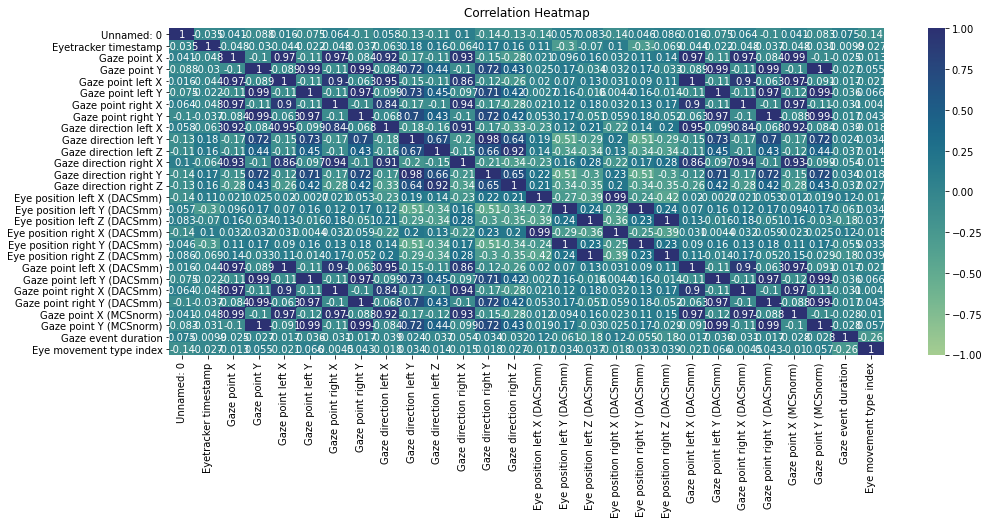

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- There are several highly correlated variables, we therefore drop variables with a correlation of more than 0.8

In [6]:
df_updated = df3.copy()

In [7]:
import numpy as np

# Create correlation matrix
corr_matrix = df_updated.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df_updated.drop(to_drop, axis=1, inplace=True)

In [8]:
df_updated.head()

,Unnamed: 0,Participant name,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze direction left Y,Gaze direction left Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Gaze event duration,Eye movement type index
0,2,Participant0001,509880650.0,962.0,346.0,0.00290,-0.99728,197.2,76.9,829.0,117.0,64.0
1,3,Participant0001,509888979.0,962.0,350.0,0.00355,-0.99796,197.2,76.9,829.0,117.0,64.0
2,4,Participant0001,509897311.0,962.0,346.0,0.00355,-0.99796,197.2,76.9,829.0,117.0,64.0
3,5,Participant0001,509905648.0,972.0,340.0,0.00181,-0.99796,197.2,77.0,828.9,117.0,64.0
4,6,Participant0001,509913976.0,970.0,323.0,0.00354,-0.99775,197.2,76.9,828.9,117.0,64.0


In [9]:
df_updated.shape

(3241523, 12)

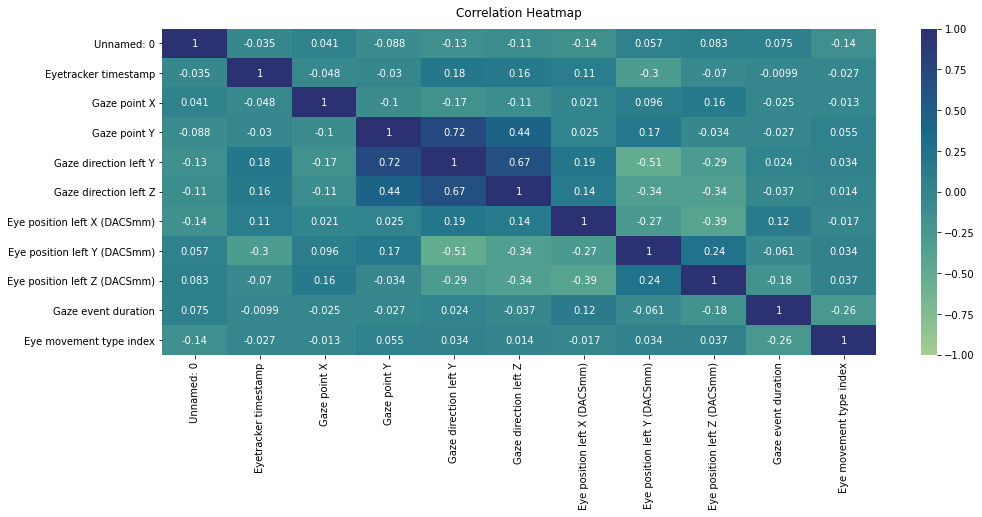

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_updated.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
#We next group the variables by the participant ID so that we can add the label

In [12]:
final_df = df_updated.groupby(['Participant name']).mean() 
final_df

,Unnamed: 0,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze direction left Y,Gaze direction left Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Gaze event duration,Eye movement type index
Participant name,,,,,,,,,,,
Participant0001,2.188393e+06,9.907376e+08,958.605080,456.788006,0.044911,-0.988085,186.694359,89.261998,761.161501,125.720363,278.780586
Participant0002,4.123233e+06,9.829719e+08,849.331627,386.940475,0.112380,-0.981409,180.582975,35.039539,710.788462,159.705739,554.177237
Participant0003,2.356249e+06,1.150424e+09,994.544995,498.696820,0.019791,-0.991825,209.756233,129.905781,878.197717,79.318570,567.738693
Participant0004,4.182482e+06,2.821776e+09,976.998315,445.782591,-0.013596,-0.991410,200.542824,130.137521,780.065776,152.354914,215.011953
Participant0005,2.455962e+06,4.726576e+09,920.265667,560.537951,0.040852,-0.984534,194.497806,123.879759,752.202627,191.505835,184.255939
Participant0006,4.398087e+06,6.111184e+09,1041.493476,394.927394,-0.015003,-0.989472,206.593148,121.119909,781.354775,229.618236,168.783822
Participant0007,2.346790e+06,8.598825e+09,848.828840,558.781513,0.159340,-0.961623,193.094619,81.534226,471.718906,265.909133,193.904505
Participant0008,4.406391e+06,9.705879e+09,896.295419,407.189738,0.075975,-0.965881,192.100044,80.726917,470.491751,382.012187,106.172114
Participant0009,2.035676e+06,5.269319e+08,964.953918,653.350428,0.104173,-0.984696,252.790307,100.143622,675.292312,232.964223,241.537452


In [13]:
final_df.shape

(60, 11)

In [14]:
# Getting the score values
scores_df = pd.read_csv('labels/Questionnaire_datasetIA.csv', encoding = 'unicode_escape')

In [15]:
scores_df.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,3,4,3,3,2,3,3,4,4,3,3,4,3,4,4,4,4,4,4,4,3,3,3,4,3,4,4,4,4,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,4,3,3,2,3,3,1,3,4,4,4,3,3,4,4,3,4,4,4,3,3,4,3,4,3,4,4,3,4,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,3,3,3,3,3,3,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,2,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2,3

In [16]:
scores = pd.DataFrame({'Participant':scores_df['Participant nr'].values, 
                      'Score':scores_df['Total Score extended'].values})

In [17]:
#choose score values for the available participants
import re
participants = []
for i in final_df.index:
    value = int(re.findall("\d+", i)[0])
    participants.append(value)
print(participants)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [18]:
available = scores['Participant'].values #Available participants
print(available)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


In [19]:
available_scores = [] #List to save scores
for num in participants:
    my_bool = num in available #Check if participant number is present in 'available' list
    if my_bool == True:
        available_scores.append(scores['Score'].loc[num-1]) #index starts from 0 but participants from 1

In [20]:
print(available_scores)

[134, 133, 116, 114, 138, 121, 127, 116, 114, 117, 128, 124, 105, 124, 122, 120, 139, 138, 137, 121, 117, 115, 128, 143, 128, 121, 113, 137, 118, 129, 121, 113, 100, 105, 104, 136, 117, 94, 139, 131, 131, 123, 128, 121, 113, 137, 118, 129, 121, 113, 100, 105, 104, 136, 117, 94, 139, 131, 131, 123]


In [21]:
final_df['score'] = available_scores #Adding the score column

In [22]:
final_df.head()

,Unnamed: 0,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze direction left Y,Gaze direction left Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Gaze event duration,Eye movement type index,score
Participant name,,,,,,,,,,,,
Participant0001,2.188393e+06,9.907376e+08,958.605080,456.788006,0.044911,-0.988085,186.694359,89.261998,761.161501,125.720363,278.780586,134
Participant0002,4.123233e+06,9.829719e+08,849.331627,386.940475,0.112380,-0.981409,180.582975,35.039539,710.788462,159.705739,554.177237,133
Participant0003,2.356249e+06,1.150424e+09,994.544995,498.696820,0.019791,-0.991825,209.756233,129.905781,878.197717,79.318570,567.738693,116
Participant0004,4.182482e+06,2.821776e+09,976.998315,445.782591,-0.013596,-0.991410,200.542824,130.137521,780.065776,152.354914,215.011953,114
Participant0005,2.455962e+06,4.726576e+09,920.265667,560.537951,0.040852,-0.984534,194.497806,123.879759,752.202627,191.505835,184.255939,138


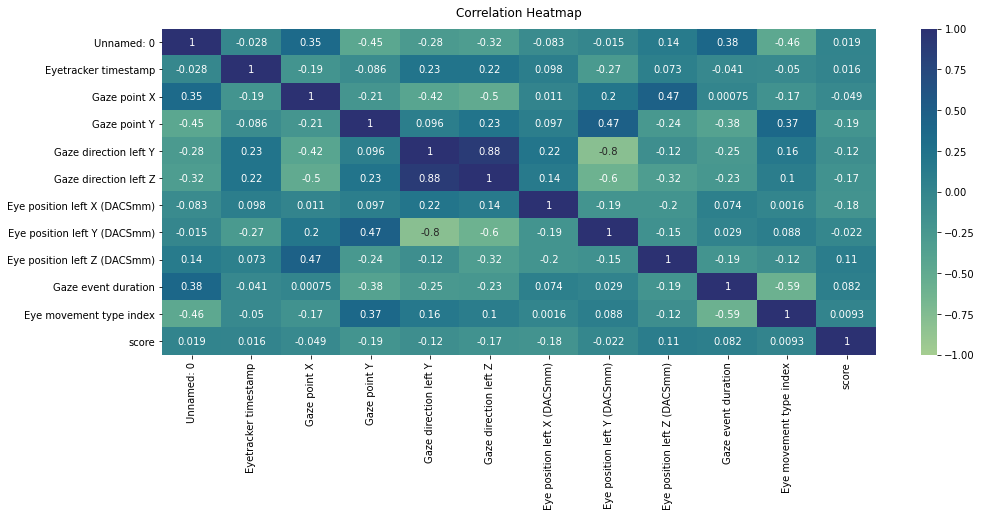

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(final_df.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

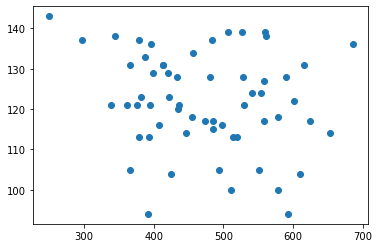

In [24]:
plt.scatter(final_df['Gaze point Y'].values, final_df['score'].values)

### X-Y Split

In [25]:
x = final_df.loc[:, final_df.columns != 'score']
x.head()

,Unnamed: 0,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze direction left Y,Gaze direction left Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Gaze event duration,Eye movement type index
Participant name,,,,,,,,,,,
Participant0001,2.188393e+06,9.907376e+08,958.605080,456.788006,0.044911,-0.988085,186.694359,89.261998,761.161501,125.720363,278.780586
Participant0002,4.123233e+06,9.829719e+08,849.331627,386.940475,0.112380,-0.981409,180.582975,35.039539,710.788462,159.705739,554.177237
Participant0003,2.356249e+06,1.150424e+09,994.544995,498.696820,0.019791,-0.991825,209.756233,129.905781,878.197717,79.318570,567.738693
Participant0004,4.182482e+06,2.821776e+09,976.998315,445.782591,-0.013596,-0.991410,200.542824,130.137521,780.065776,152.354914,215.011953
Participant0005,2.455962e+06,4.726576e+09,920.265667,560.537951,0.040852,-0.984534,194.497806,123.879759,752.202627,191.505835,184.255939


In [26]:
y = final_df["score"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
x_train.head()

,Unnamed: 0,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze direction left Y,Gaze direction left Z,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Gaze event duration,Eye movement type index
Participant name,,,,,,,,,,,
Participant0031,1.478664e+06,5.232756e+09,874.076982,376.054133,0.214787,-0.968490,236.448344,-26.216664,607.372910,196.358517,406.654344
Participant0042,4.322905e+06,2.396792e+09,937.122428,422.400039,0.164340,-0.981080,226.056603,23.772116,608.090900,325.307027,119.247999
Participant0034,4.344883e+06,5.093422e+08,849.488264,493.644151,0.233025,-0.957870,223.883928,30.507566,436.615038,551.557585,79.802113
Participant0044,4.315736e+06,5.392824e+08,940.703474,338.340055,0.046017,-0.983531,227.280600,74.738297,467.432318,628.382222,91.435106
Participant0050,4.400576e+06,3.736566e+08,865.447961,514.209046,0.109450,-0.985587,225.436986,64.798408,681.317759,241.878192,127.497890


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler().fit(x_train)

In [32]:
x_train_std = sc.transform(x_train)

In [33]:
x_test_std = sc.transform(x_test)

In [34]:
import xgboost
from xgboost import XGBRegressor

In [35]:
model = XGBRegressor()

In [36]:
model.fit(x_train_std, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_train, model.predict(x_train_std))

0.9999999975801457

In [70]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C = 1000)

In [71]:
svr.fit(x_train_std, y_train)

SVR(C=1000)

In [72]:
r2_score(y_train, svr.predict(x_train_std))

0.9999345435181424